In [1]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work
!pip install gym

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time

In [3]:
class DeterGridEnvironment(gym.Env):            #Deterministic enviroment
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)  #12
        self.action_space = spaces.Discrete(4)   #4
        self.max_timesteps = 25   #10

    def reset(self):
        self.timestep = 0
        self.reward=0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.r1=[0,2]
        self.r2=[1,1]
        self.r3=[1,3]
        self.r4=[3,0]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.75
        self.state[tuple(self.r1)] = 0.5
        self.state[tuple(self.r2)] = 0.25
        self.state[tuple(self.r3)] = 0.5
        self.state[tuple(self.r4)] = 0.5
        observation = self.state.flatten()
        return observation
    
    def step(self, action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:  #Down
          self.agent_pos[0] += 1
        if action == 1:  #Up
          self.agent_pos[0] -= 1
        if action == 2:  #Right
          self.agent_pos[1] += 1
        if action == 3:  #Left
          self.agent_pos[1] -= 1
          
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.75
        self.state[tuple(self.r1)] = 0.5
        self.state[tuple(self.r2)] = 0.25
        self.state[tuple(self.r3)] = 0.5
        self.state[tuple(self.r4)] = 0.5
        observation = self.state.flatten()
        
        
        if (self.agent_pos == self.goal_pos).all():
          self.reward += 100
          print('Goal Reached: +100')
        elif (self.agent_pos == self.r1).all():
          self.reward +=1
          print('Got a gold: +1')
        elif (self.agent_pos == self.r2).all():
          self.reward -=2
          print('Bandits: -2')
        elif (self.agent_pos == self.r3).all():
          self.reward +=1
          print('Got a gold: +1')
        elif (self.agent_pos == self.r4).all():
          self.reward +=1
          print('Got a gold: +1')   

        
        self.timestep += 1
        if self.timestep >= self.max_timesteps:
          done = True
        elif (self.agent_pos == self.goal_pos).all():
          done = True
        else:
          done = False 
        info = {}
        
        return observation, self.reward, done, info

    def render(self):
        plt.imshow(self.state)

In [4]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bandits: -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bandits: -2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Goal Reached: +100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

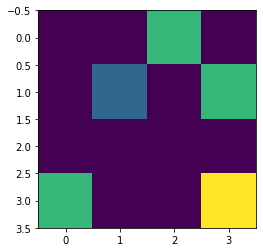

<IPython.core.display.Javascript object>

Total reward: 96


In [ ]:
env = DeterGridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()


while not done:
  action = agent.step(obs)
  obs, reward, done, info = env.step(action)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
  time.sleep(1)
print('Total reward:', env.reward)

In [5]:
class q_learning:

  def __init__(self):
    self.env = DeterGridEnvironment()
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values=np.zeros((16,4))
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilondecay=[]
    self.epsilon=1
    self.lr=0.2
    self.df=0.9
    self.decay=0.9954

  def reset(self):
    self.env.agent_pos=[0,0]
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.state=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0

  def action1(self,state1,epsilon):
    if np.random.rand()>epsilon:
      return np.argmax(self.q_values[state1])
    else:
      return np.random.randint(4)
  
  def takeaction(self,action):
    if action == 0:  #Down
        self.env.agent_pos[0] += 1
    elif action == 1:  #Up
        self.env.agent_pos[0] -= 1
    elif action == 2:  #Right
        self.env.agent_pos[1] += 1
    elif action == 3:  #Left
        self.env.agent_pos[1] -= 1
    self.env.agent_pos = np.clip(self.env.agent_pos, 0, 3)
    
    if (self.env.agent_pos == self.env.goal_pos).all():
        self.reward = 100
    elif (self.env.agent_pos == self.env.r1).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r2).all():
        self.reward =-2 
    elif (self.env.agent_pos == self.env.r3).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r4).all():
        self.reward =1
    else:
        self.reward = 0

    self.env.timestep+=1
    self.stepno+=1

    return(self.env.agent_pos,self.reward)
  
  def training(self):
    for episode in range(1000):
      self.reset()
      while not self.done1:
        self.q_values[15]=0
        action=self.action1(self.state,self.epsilon)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*np.max(self.q_values[newstate])-self.q_values[self.state,action])
        self.state=newstate

        self.rewardsum+=reward

        
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay
  
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.reset()
      while not self.done1:
        self.q_values[15]=0
        action=self.action1(self.state,self.epsilon)
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*np.max(self.q_values[newstate])-self.q_values[self.state,action])
        self.state=newstate

        self.rewardsum+=reward

        
        
        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)

In [6]:
class sarsa:

  def __init__(self):
    self.env = DeterGridEnvironment()
    self.env.reset()
    self.agent = RandomAgent(self.env)
    self.q_values=np.zeros((16,4))
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilon=1
    self.lr=0.2
    self.df=0.9
    self.decay=0.9954
    self.epsilondecay=[]

  def reset(self):
    self.env.agent_pos=[0,0]
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.state=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0

  def action1(self,state1,epsilon):
    if np.random.rand()>epsilon:
      return np.argmax(self.q_values[state1])
    else:
      return np.random.randint(4)
  
  def takeaction(self,action):
    if action == 0:  #Down
        self.env.agent_pos[0] += 1
    elif action == 1:  #Up
        self.env.agent_pos[0] -= 1
    elif action == 2:  #Right
        self.env.agent_pos[1] += 1
    elif action == 3:  #Left
        self.env.agent_pos[1] -= 1
    self.env.agent_pos = np.clip(self.env.agent_pos, 0, 3)
    
    if (self.env.agent_pos == self.env.goal_pos).all():
        self.reward = 100
    elif (self.env.agent_pos == self.env.r1).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r2).all():
        self.reward =-2 
    elif (self.env.agent_pos == self.env.r3).all():
        self.reward =1
    elif (self.env.agent_pos == self.env.r4).all():
        self.reward =1
    else:
        self.reward = 0

    self.env.timestep+=1
    self.stepno+=1

    return(self.env.agent_pos,self.reward)
  
  def training(self):
    for episode in range(1000):
      self.reset()
      action=self.action1(self.state,self.epsilon)
      while not self.done1:
        self.q_values[15]=0
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        nextaction=self.action1(newstate,self.epsilon)
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*self.q_values[newstate,nextaction]-self.q_values[self.state,action])
        self.state=newstate
        action=nextaction
        self.rewardsum+=reward

        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay

  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      self.reset()
      action=self.action1(self.state,self.epsilon)
      while not self.done1:
        self.q_values[15]=0
        
        self.env.agent_pos, reward = self.takeaction(action)
        newstate=4*self.env.agent_pos[0]+self.env.agent_pos[1]  #state update
        
        nextaction=self.action1(newstate,self.epsilon)
        self.q_values[self.state,action]=self.q_values[self.state,action] + self.lr*(reward+self.df*self.q_values[newstate,nextaction]-self.q_values[self.state,action])
        self.state=newstate
        action=nextaction
        self.rewardsum+=reward

        if self.env.timestep >= self.env.max_timesteps:
          self.done1 = True
        elif (self.env.agent_pos == self.env.goal_pos).all():
          self.done1 = True
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum) 


In [7]:
def QLimplemetation():
    print('Implementing Q learning:\n')
    table1=q_learning()
    table1.training()
    print('Q table values after training:')
    print(table1.q_values)

    plot1 = plt.figure(1)
    plt.xlabel('Episodes')
    plt.title('Q learning results after training for deterministic environment')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')

    plot2 = plt.figure(2)
    plt.plot(table1.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon')
    
    print('Q table values after evaluation:')
    table1.evaluation()
    print(table1.q_values)

    plot3=plt.figure(3)
    plt.xlabel('Episodes')
    plt.title('Q learning results after evaluation for deterministic environment:')
    plt.plot(table1.totalreward)
    plt.plot(table1.stepstaken)
    plt.legend(['Reward per episode','Steps per episode'],loc='best')
    plt.show()

def sarsaimplementation():
  print('Implementing SARSA:\n')
  table2=sarsa()
  table2.training()
  print('Q table values after training:')
  print(table2.q_values)

  plot1=plt.figure(1)
  plt.xlabel('Episodes')
  plt.title('SARSA results after training for deterministic environment')
  plt.plot(table2.totalreward)
  plt.plot(table2.stepstaken)
  plt.legend(['Reward per episode','Steps per episode'],loc='best')

  plot2=plt.figure(2)
  plt.plot(table2.epsilondecay)
  plt.xlabel('Episodes')
  plt.ylabel('Epsilon')

  table2.evaluation()
  print('Q values after evaluation:')
  print(table2.q_values)

  plot3=plt.figure(3)
  plt.xlabel('Episodes')
  plt.title('SARSA results after evaluation for deterministic environment:')
  plt.plot(table2.totalreward)
  plt.plot(table2.stepstaken)
  plt.legend(['Reward per episode','Steps per episode'],loc='best')
  plt.show()

Implementing Q learning:

Q table values after training:
[[ 59.859       53.73517667  57.24798309  53.86891597]
 [ 63.6098262   54.26237957  63.4819833   51.73252568]
 [ 72.56730053  45.8900596   42.51688702  26.85356199]
 [ 70.56627834  15.34841038  27.44360814  38.63665201]
 [ 66.51        53.85708289  63.60999996  59.78855505]
 [ 72.9         56.76036998  72.77705359  57.99953388]
 [ 80.99994867  57.23144344  76.59056561  62.45695032]
 [ 89.56768574  46.80202651  44.59878195  61.94952058]
 [ 73.9         59.82643896  72.9         66.47736969]
 [ 80.99559623  63.52602188  81.          65.76680157]
 [ 90.          72.88849051  89.9779893   72.8986279 ]
 [ 99.99776993  76.92714772  84.57839783  76.17560077]
 [ 73.83410369  66.38729393  81.          73.78140699]
 [ 80.99898226  72.89899024  90.          73.88444494]
 [ 89.99798754  80.99962812 100.          80.99997289]
 [  0.           0.           0.           0.        ]]
Q table values after evaluation:
[[ 59.859       53.73517667  

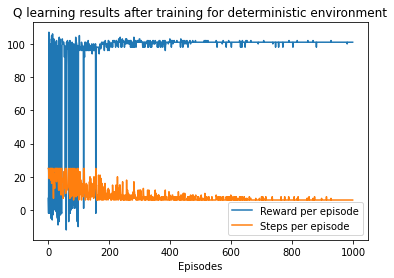

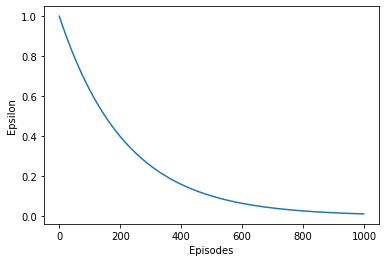

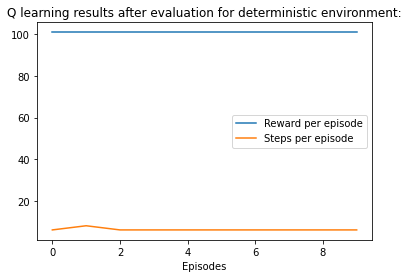

Implementing SARSA:

Q table values after training:
[[ 36.56977954  50.87843778  59.21139764  47.80086771]
 [ 56.418482    49.89075146  65.92730903  43.2330825 ]
 [ 72.79523326  64.29564349  66.25987266  50.33932408]
 [ 78.7468627   42.39820723  49.71448631  47.31937852]
 [  7.46405778  15.39563593  53.80541644  15.45545169]
 [ 47.17620082  25.89518513  72.31035761  23.38110585]
 [ 68.82871003  58.6473359   81.55022197  58.19040969]
 [ 89.86675586  65.71363477  77.72167166  64.8305641 ]
 [ 17.19928489   1.48256135  17.25626696   6.08599919]
 [ 25.41623503  11.11169508  68.70320462   8.41357836]
 [ 56.59669885  50.60458081  88.98729592  40.70522009]
 [100.          74.50983533  88.69162219  78.9934233 ]
 [  8.17331462   8.49258741  32.38455043  11.2690526 ]
 [ 26.70400898  11.79920671  81.27260645  16.78020552]
 [ 49.21373421  35.62275509  99.99564439  49.22107808]
 [  0.           0.           0.           0.        ]]
Q values after evaluation:
[[ 36.56977954  50.87843778  59.84041217

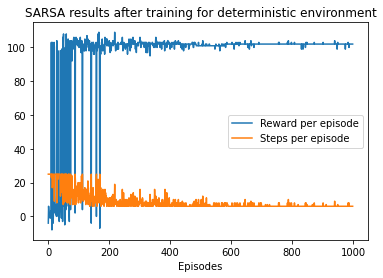

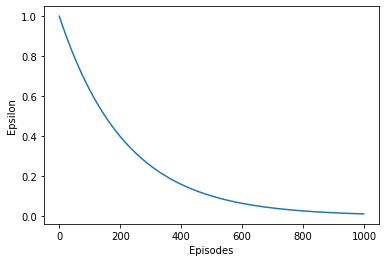

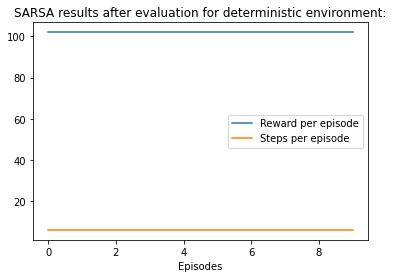

In [9]:
if __name__ == "__main__":
  QLimplemetation()
  sarsaimplementation()